# 1.Understanding Problem Space

In [52]:
import pandas as pd
import numpy as np
#from io import BytesIO
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter

In [6]:
#We charge the dataframes

abandoned_carts = pd.read_parquet("abandoned_carts.parquet")
inventory = pd.read_parquet("inventory.parquet")
orders = pd.read_parquet("orders.parquet")
regulars = pd.read_parquet("regulars.parquet")
users = pd.read_parquet("users.parquet")

In [3]:
#We start analysing abandoned_carts field by field.
#It is noticeable how the majority of the elements of the dataframe are missing (we have 
# 5000 out of 70000), so the ideas extracted have to be taken with a pinch of salt. 

print(abandoned_carts)

                   id                                            user_id  \
0      12858560217220  5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...   
13     20352449839236  9d6187545c005d39e44d0456d87790db18611d7c7379bd...   
45     20478401413252  e83fb0273d70c37a2968fee107113698fd4f389c442c0b...   
50     20481783103620  10c42e10e530284b7c7c50f3a23a98726d5747b8128084...   
52     20485321687172  d9989439524b3f6fc4f41686d043f315fb408b954d6153...   
...               ...                                                ...   
70036  22233840976004  2e989bfdec87ef55ea464a529f323ff53dad2a2fc48655...   
70041  22233843171460  b2d867b982b14ca517f27c4ced727c8a25c01b96ebbd96...   
70043  22233843531908  220aafc0749f209b3f0f7cfe4134a5136815d48f0bbd9a...   
70049  22233846218884  a4da55d51052411e54f98e1b90b19843121866abeaea76...   
70050  22233846317188  c0e740ecabe7bd19eaed35b5ea9be7bc80c15f32124712...   

               created_at                                         variant_id  
0     20

In [51]:
#On a superficial level, there are no nulls, so we move forward

abandoned_carts.isnull().count()

id            5457
user_id       5457
created_at    5457
variant_id    5457
dtype: int64

In [8]:
#abandoned_carts id: unique id value for each order / purchase. 

ac_id_unique = set(abandoned_carts["id"])
print(len(ac_id)) #matches with rows read before

5457


In [20]:
#user id: unique id of the users that have abandoned a cart. 
#Column has duplicates, so some users have abandoned more than one cart. 

ac_user_id_unique = set(abandoned_carts["user_id"])
print(len(ac_user_id_unique))

3439


In [47]:
#Majority of users have abandoned 1 - 2 carts. The number of people abandoning carts reduces with the
#frequency; not many of them abandon from 5 carts onwards. 

ac_user_id = Counter(abandoned_carts["user_id"].tolist())
ac_number_peruser=[]
for key in ac_user_id:
    ac_number_peruser.append(ac_user_id[key])
ac_number_peruser=Counter(ac_number_peruser)
ac_number_peruser=dict(sorted(ac_number_peruser.items(), key=lambda item: item[1]))
print(ac_number_peruser)

{10: 1, 9: 1, 6: 6, 7: 8, 5: 23, 4: 51, 3: 238, 2: 1202, 1: 1909}


In [72]:
#created_at: when the basket was generated. We can perform some data aggrupations to see if there is
#a seasonality on the cancellations, or if they were done during one specific year.

created_at_date_separated = pd.DataFrame(columns=['Year','Month','Day','Hour'])
for element in abandoned_carts["created_at"]:
    created_at_date_separated.loc[len(created_at_date_separated)]={'Year': element.year, 'Month':element.month,'Day':element.day,'Hour':element.hour}
created_at_date_separated
    

,Year,Month,Day,Hour
0,2020,5,20,13
1,2021,6,27,5
2,2021,7,18,8
3,2021,7,18,21
4,2021,7,19,12
...,...,...,...,...
5452,2022,3,13,14
5453,2022,3,13,14
5454,2022,3,13,14
5455,2022,3,13,14


In [73]:
#Somehow, the majority of the cancellations are accummulated during autumn-winter, whereas in 
#spring - summer there are the lowest numbers.

print(created_at_date_separated.groupby(['Year','Month'])['Day'].count())


Year  Month
2020  5           1
2021  6           1
      7          25
      8         135
      9         248
      10        560
      11        988
      12        871
2022  1        1318
      2         989
      3         321
Name: Day, dtype: int64


<BarContainer object of 31 artists>

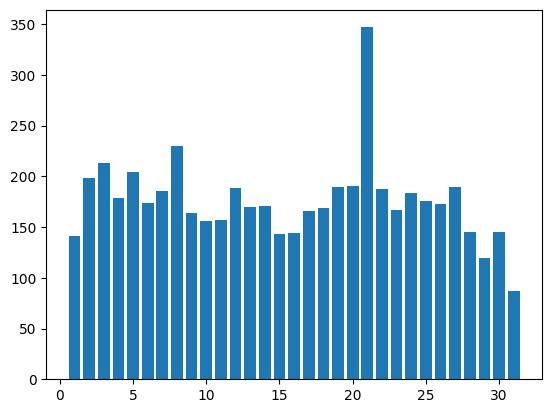

In [80]:
#Except maybe from outlier 21st, all of the days the cancellation rate is similar

plt.bar(range(1,32),created_at_date_separated.groupby(['Day'])['Month'].count())

<BarContainer object of 24 artists>

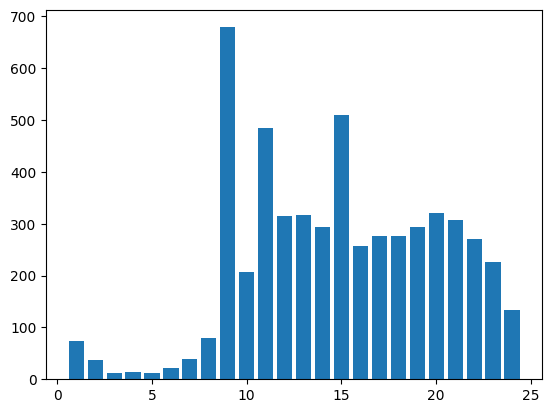

In [81]:
#The fact that not many baskets are cancelled at night implies how this service is not international,
#kind of restricted to limited timezones. The peak hours of cancellations are the standard ones: first
#thing in the morning (9.00), mid-morning (around 11.00) and first thing in the afternoon (15.00)

plt.bar(range(1,25),created_at_date_separated.groupby(['Hour'])['Month'].count())

In [49]:
#variant id: not entirely defined field by itself, but with inventory we discover that it is the id
#of the product in the basket

In [4]:
print(inventory)

          variant_id  price  compare_at_price          vendor  \
0     39587297165444   3.09              3.15           heinz   
1     34370361229444   4.99              5.50   whogivesacrap   
2     34284951863428   3.69              3.99          plenty   
3     33667283583108   1.79              1.99  thecheekypanda   
4     33803537973380   1.99              2.09         colgate   
...              ...    ...               ...             ...   
1728  39539419218052   4.99              5.99          bother   
1729  34534187368580   4.69              5.49    tommeetippee   
1730  33826439594116  15.39             17.15          colief   
1731  33667214508164  19.49             21.65      enterosgel   
1732  33667214704772  31.99             34.60         eskimo3   

                         product_type  \
0                condiments-dressings   
1     toilet-roll-kitchen-roll-tissue   
2     toilet-roll-kitchen-roll-tissue   
3     toilet-roll-kitchen-roll-tissue   
4             

In [ ]:
#Stuff to study:
#- Do the buyers that have abandoned a cart bought another order, or do they never even consider
#buying something again? -> Improvement quality

#Maybe they are people that started the order and never
#finished it. Maybe they are already users that had to cancel an order. Maybe that low number of 
#people with more orders rejected (7 onwards) are habitual clients that as they do many orders they 
#sometimes do errors and have to cancel more often...